In [46]:
# import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
path = 'data/objects.csv'
objects = pd.read_csv(path, low_memory=False)

In [47]:
objects.head()
objects.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [56]:
objects.describe()
objects = objects.drop(['parent_id', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height'], axis=1)


TypeError: 'value' must be an instance of str or bytes, not a float

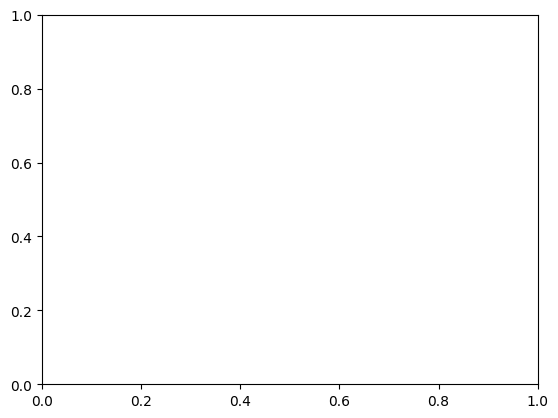

In [93]:
objects.columns
# objects = objects.drop([], axis=1)
objects[['region']] = objects[['region']].replace('unknown', np.nan)
objects.region
objects[['region']].isna().value_counts()
plt.scatter(objects[['region']], objects[['funding_total_usd']])


In [70]:
objects.isna().sum()

id                          0
entity_type                 0
entity_id                   0
name                        4
normalized_name            31
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_milestone_at     362293
last_milestone_at      362293
milestones                  0
relationships               0
created_by             123165
created_at                 60
updated_at                  0
dtype: int

In [73]:
objects.shape


(462651, 33)

In [30]:
funding_rounds = pd.read_csv('data/funding_rounds.csv')
funding_rounds.columns
funding_rounds.object_id

0             c:4
1             c:5
2             c:5
3             c:5
4          c:7299
           ...   
52923    c:211890
52924    c:267427
52925    c:261728
52926    c:285864
52927    c:286215
Name: object_id, Length: 52928, dtype: object

In [45]:
funding_rounds.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [92]:
funding_rounds.isna().sum()
funding_rounds.iloc[funding_rounds['raised_amount_usd'].idxmax()]

id                                                                      47231
funding_round_id                                                        47231
object_id                                                              c:4843
funded_at                                                          2012-03-05
funding_round_type                                                      other
funding_round_code                                                 debt_round
raised_amount_usd                                                3835050000.0
raised_amount                                                    3835050000.0
raised_currency_code                                                      USD
pre_money_valuation_usd                                                   0.0
pre_money_valuation                                                       0.0
pre_money_currency_code                                                   USD
post_money_valuation_usd                                        

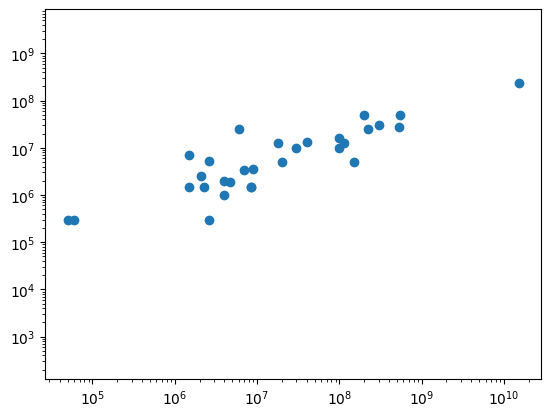

In [74]:
plt.scatter(funding_rounds['pre_money_valuation_usd'], funding_rounds['raised_amount_usd'])
plt.xscale('log')
plt.yscale('log')
plt.show()

In [32]:
funding_rounds.object_id
# objects.id

0             c:4
1             c:5
2             c:5
3             c:5
4          c:7299
           ...   
52923    c:211890
52924    c:267427
52925    c:261728
52926    c:285864
52927    c:286215
Name: object_id, Length: 52928, dtype: object

In [33]:
acquisitions = pd.read_csv('data/acquisitions.csv')
acquisitions.columns
acquisitions.id

0          1
1          2
2          3
3          4
4          5
        ... 
9557    9558
9558    9559
9559    9560
9560    9561
9561    9562
Name: id, Length: 9562, dtype: int64

In [34]:
degrees = pd.read_csv('data/degrees.csv')
degrees.columns
degrees

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09
...,...,...,...,...,...,...,...,...
109605,109606,p:268589,CPA,NaN,American Institute of Certtified Public Accoun...,NaN,2013-12-12 14:28:58,2013-12-12 14:28:58
109606,109607,p:268527,MS & BS,Engineering,South China University of Technology,NaN,2013-12-12 14:31:21,2013-12-12 14:31:21
109607,109608,p:268527,PhD,Engineering,Clarkson University,NaN,2013-12-12 14:31:48,2013-12-12 14:31:48
109608,109609,p:268528,B.S.,Electrical Engineering,Colorado State University,NaN,2013-12-12 14:38:15,2013-12-12 14:38:15


# Do C's get Degrees?

In [41]:
degrees = pd.read_csv('data/degrees.csv')
degrees.columns
degrees

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09
...,...,...,...,...,...,...,...,...
109605,109606,p:268589,CPA,NaN,American Institute of Certtified Public Accoun...,NaN,2013-12-12 14:28:58,2013-12-12 14:28:58
109606,109607,p:268527,MS & BS,Engineering,South China University of Technology,NaN,2013-12-12 14:31:21,2013-12-12 14:31:21
109607,109608,p:268527,PhD,Engineering,Clarkson University,NaN,2013-12-12 14:31:48,2013-12-12 14:31:48
109608,109609,p:268528,B.S.,Electrical Engineering,Colorado State University,NaN,2013-12-12 14:38:15,2013-12-12 14:38:15


In [83]:
people = pd.read_csv('data/people.csv')
people.columns
people['affiliation_name'] = people['affiliation_name'].replace("Unaffiliated", None)
people

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures
...,...,...,...,...,...,...
226704,226705,p:268589,John,Pins,NaN,None
226705,226706,p:268590,David,Schulhof,NaN,None
226706,226707,p:268592,Matthew,D. Rosen,NaN,None
226707,226708,p:268593,Gordon,Hutchins,NaN,None


In [50]:
people_df = pd.merge(people, degrees, left_on='object_id', right_on='object_id', how='outer')
people_df

,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,graduated_at,created_at,updated_at
0,9.0,p:10,Mark,Zuckerberg,NaN,Facebook,2415.0,NaN,Computer Science,Harvard University,NaN,2009-03-24 22:50:22,2013-03-28 22:26:47
1,87.0,p:100,Peter,Lester,NaN,Plaxo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,874.0,p:1000,Dr. Steven,E. Saunders,NaN,Droplet Technology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8463.0,p:10000,Neil,Capel,NaN,Music Nation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,87040.0,p:100000,Sue,Pilsch,NaN,Unaffiliated,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268243,87037.0,p:99997,Peter,Lalonde,"Montreal, Canada",Openera,69682.0,BA,Communications,University of Ottawa,1993-01-01,2013-08-26 13:01:58,2013-08-26 13:01:58
268244,87037.0,p:99997,Peter,Lalonde,"Montreal, Canada",Openera,69683.0,Minor,Economics,Concordia University,1991-01-01,2013-08-26 13:01:58,2013-08-26 13:01:58
268245,87037.0,p:99997,Peter,Lalonde,"Montreal, Canada",Openera,69684.0,DEC,Communications,John Abbott College,1989-01-01,2013-08-26 13:02:22,2013-08-26 13:02:22
268246,87038.0,p:99998,Adam,Neumann,NaN,Unaffiliated,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# New Section

In [38]:
merged_df = pd.merge(objects, degrees, left_on='id', right_on='object_id', how='outer')
merged_df

,id_x,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,created_at_x,updated_at_x,id_y,object_id,degree_type,subject,institution,graduated_at,created_at_y,updated_at_y
0,c:1,Company,1.0,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2007-05-25 06:51:27,2013-04-13 03:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c:10,Company,10.0,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,2007-05-31 21:11:51,2008-05-23 23:23:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,c:100,Company,100.0,NaN,There,there,/company/there,games_video,acquired,NaN,...,2007-08-06 23:52:45,2013-11-04 02:09:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c:10000,Company,10000.0,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c:10001,Company,10001.0,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504185,r:9995,Product,9995.0,c:14164,"SiteLink, listing feed for Brokerages",sitelink listing feed for brokerages,/product/sitelink-listing-feed-for-brokerages,NaN,operating,NaN,...,2008-11-28 14:34:12,2008-11-28 23:24:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504186,r:9996,Product,9996.0,c:14164,"EDCLink, listing feed for Economic Development...",edclink listing feed for economic development ...,/product/edclink-listing-feed-for-economic-dev...,NaN,operating,NaN,...,2008-11-28 14:34:13,2008-11-28 23:24:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504187,r:9997,Product,9997.0,c:14164,"Cmail, broadcast email marketing",cmail broadcast email marketing,/product/cmail-broadcast-email-marketing,NaN,operating,NaN,...,2008-11-28 14:34:13,2008-11-28 23:24:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504188,r:9998,Product,9998.0,c:14164,"CatylistCRM, contact database",catylistcrm contact database,/product/catylistcrm-contact-database,NaN,operating,NaN,...,2008-11-28 14:34:13,2008-11-28 23:24:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
merged_df.columns

Index(['id_x', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at_x', 'updated_at_x', 'id_y', 'object_id', 'degree_type',
       'subject', 'institution', 'graduated_at', 'created_at_y',
       'updated_at_y'],
      dtype='object')

In [23]:
objects.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [24]:
funding_rounds[['pre_money_valuation', 'post_money_valuation']]


,pre_money_valuation,post_money_valuation
0,0.0,0.0
1,0.0,0.0
2,115000000.0,0.0
3,525000000.0,0.0
4,0.0,0.0
...,...,...
52923,0.0,0.0
52924,0.0,0.0
52925,0.0,0.0
52926,0.0,0.0


In [25]:
funding_rounds = funding_rounds[(funding_rounds['post_money_valuation'] != 0)]
funding_rounds[['pre_money_valuation', 'post_money_valuation']]


,pre_money_valuation,post_money_valuation
5,8500000.0,1.000000e+07
6,100000000.0,1.100000e+08
13,0.0,1.750000e+07
18,0.0,7.500000e+06
19,0.0,3.350000e+07
...,...,...
52250,0.0,9.000000e+09
52428,0.0,7.500000e+06
52429,0.0,2.000000e+07
52433,0.0,2.000000e+06


In [26]:
import sys
print(sys.executable)


/opt/anaconda3/envs/comp209/bin/python
